# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below,  I gathered **all** three pieces of data for this project and load them in the notebook.
1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np

import pandas as pd

import re

import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:

data = pd.read_csv("twitter-archive-enhanced.csv")
data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. I Used the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
request = requests.get(url)

with open(url.split("/")[-1], mode='wb') as file:
    file.write(request.content)

    
image_pred = pd.read_csv("image-predictions.tsv",sep="\t")
image_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. I Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = data.tweet_id.values
len(tweet_ids)



# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2]:
# loading the text data 
tweet_count = pd.read_json("tweet_json.txt", lines=True)

In [3]:
tweet_count.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorited  retweeted  possibly_sensitive  \
0  ...      False      False                 0.0   
1  ...      False      False                 0.0   
2  ...      False      False                 0.0   
3  ...      False      False                 0.0   
4  ...      False      False                 0.0   

  possibly_sensitive_appealable lang  retweeted_status  quoted_status_id  \
0                           0.0   en               NaN               NaN   
1                           0.0   en               NaN               NaN   
2                           0.0   en               NaN               NaN   
3                           0.0   en               NaN               NaN   
4                           0.0   en               NaN               NaN   

  quoted_status_id_str  quoted_status_permalink  quoted_status  
0                  NaN                      NaN            NaN  
1                  NaN                      NaN            NaN  
2                  NaN                      NaN            NaN  
3                  NaN                      NaN            NaN  
4                  NaN                      NaN            NaN  

[5 rows x 32 columns]

In [5]:
# Using only the columns that i will be using for analyzing
tweet_count=tweet_count[["id","retweet_count","favorite_count","display_text_range"]]
tweet_count.head()

id  retweet_count  favorite_count display_text_range
0  892420643555336193           6875           32866            [0, 85]
1  892177421306343426           5177           28396           [0, 138]
2  891815181378084864           3421           21342           [0, 121]
3  891689557279858688           7082           35836            [0, 79]
4  891327558926688256           7590           34279           [0, 138]

## Assessing Data
In this section, I will be detecting and documenting **quality issues and tidiness issue**. I used **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.





The data dataframe was viewed on Spreadsheets *(the variables for each column were too long to be viewed easily on jupyter notebook)* thereby engaging myself in visual assessment to access the data

In [6]:
data.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
841   766864461642756096                    NaN                  NaN   
2207  668627278264475648                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
2188  668975677807423489                    NaN                  NaN   
846   766313316352462849                    NaN                  NaN   
1919  674269164442398721                    NaN                  NaN   
1157  724405726123311104                    NaN                  NaN   
264   842163532590374912                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
506   812747805718642688                    NaN                  NaN   

                      timestamp  \
841   2016-08-20 05:08:29 +0000   
2207  2015-11-23 03:09:00 +0000   
8     2017-07-27 16:25:51 +0000   
2188  2015-11-24 02:13:25 +0000   
846   2016-08-18 16:38:26 +0000   
1919  2015-12-08 16:47:50 +0000   
1157  2016-04-25 01:12:38 +0000   
264   2017-03-16 00:00:07 +0000   
2331  2015-11-16 20:32:58 +0000   
506   2016-12-24 19:52:31 +0000   

                                                 source  \
841   <a href="http://twitter.com/download/iphone" r...   
2207  <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
2188  <a href="http://twitter.com/download/iphone" r...   
846   <a href="http://twitter.com/download/iphone" r...   
1919  <a href="http://twitter.com/download/iphone" r...   
1157  <a href="http://twitter.com/download/iphone" r...   
264   <a href="http://twitter.com/download/iphone" r...   
2331  <a href="http://twitter.com/download/iphone" r...   
506   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
841   RT @dog_rates: We only rate dogs... this is a ...         7.599238e+17   
2207  This is Timofy. He's a pilot for Southwest. It...                  NaN   
8     This is Zoey. She doesn't want to be one of th...                  NaN   
2188  This is Jeremy. He hasn't grown into his skin ...                  NaN   
846   This is Oscar. He has legendary eyebrows and h...                  NaN   
1919  This is Bob. He's a Juniper Fitzsimmons. His b...                  NaN   
1157  This is Ashleigh. She's having Coachella withd...                  NaN   
264   Meet George. He looks slightly deflated but ov...                  NaN   
2331  Here we have a mixed Asiago from the Galápagos...                  NaN   
506   RT @dog_rates: Meet Sammy. At first I was like...         6.800555e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
841               4.196984e+09  2016-08-01 01:28:46 +0000   
2207                       NaN                        NaN   
8                          NaN                        NaN   
2188                       NaN                        NaN   
846                        NaN                        NaN   
1919                       NaN                        NaN   
1157                       NaN                        NaN   
264                        NaN                        NaN   
2331                       NaN                        NaN   
506               4.196984e+09  2015-12-24 16:00:30 +0000   

                                          expanded_urls  rating_numerator  \
841   https://twitter.com/dog_rates/status/759923798...                10   
2207  https://twitter.com/dog_rates/status/668627278...                 9   
8     https://twitter.com/dog_rates/status/890609185...                13   
2188  https://twitter.com/dog_rates/status/668975677...                11   
846   https://twitter.com/dog_rates/status/766313316...                12   
1919  https://twitter.com/dog_rates/status/674269164...                 8   
1157  https://twitter.com/dog_rates/status/724405726...                10   
264   https://twit

Engaging in Programmatic accessment to access the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
data[~data.in_reply_to_status_id.isnull()]

# it looks like these data part are replies to a tweet, which incldes retweets, replies,etc. This can be explored for later use

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
...                  ...                    ...                  ...   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2169  669353438988365824           6.678065e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
30    2017-07-15 16:51:35 +0000   
55    2017-07-02 21:58:53 +0000   
64    2017-06-27 12:14:36 +0000   
113   2017-06-02 19:38:25 +0000   
148   2017-05-13 16:15:35 +0000   
...                         ...   
2038  2015-12-01 04:44:10 +0000   
2149  2015-11-26 01:11:28 +0000   
2169  2015-11-25 03:14:30 +0000   
2189  2015-11-24 01:42:25 +0000   
2298  2015-11-18 20:02:51 +0000   

                                                 source  \
30    <a href="http://twitter.com/download/iphone" r...   
55    <a href="http://twitter.com/download/iphone" r...   
64    <a href="http://twitter.com/download/iphone" r...   
113   <a href="http://twitter.com/download/iphone" r...   
148   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2038  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
2169  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   
2298  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   
55    @roushfenway These are good dogs but 17/10 is ...                  NaN   
64                      @RealKentMurphy 14/10 confirmed                  NaN   
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...                  NaN   
148   @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   
...                                                 ...                  ...   
2038  After 22 minutes of careful deliberation this ...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
2169  This is Tessa. She is also very pleased after ...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   
2298  After much debate this dog is being upgraded t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
30                         NaN                        NaN   
55                         NaN                        NaN   
64                         NaN                        NaN   
113                        NaN                        NaN   
148                        NaN                        NaN   
...                        ...                        ...   
2038                       NaN                        NaN   
2149                       NaN                        NaN   
2169                       NaN                        NaN   
2189                       NaN                        NaN   
2298                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
30                                                  NaN                12   
55                                                  NaN                17   
64                                                  NaN                14   
113                

In [9]:
# A brief description of the data
data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [10]:
tweet_count.describe()

id  retweet_count  favorite_count
count  2.325000e+03    2325.000000     2325.000000
mean   7.416926e+17    2424.027097     6865.020215
std    6.814903e+16    4103.357667    10662.367785
min    6.660209e+17       0.000000        0.000000
25%    6.780233e+17     487.000000     1196.000000
50%    7.177900e+17    1127.000000     2975.000000
75%    7.986285e+17    2804.000000     8390.000000
max    8.924206e+17   69382.000000   141571.000000

In [11]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [13]:
with pd.option_context('display.max_colwidth', None):
  display(data.expanded_urls.sample(10))

999                                                                                                                                                                                                                                       https://vine.co/v/iiLjKuYJpr6
127                                                                                                                                                                                                     https://twitter.com/dog_rates/status/867900495410671616/photo/1
2248                                                                                                                                                                                                    https://twitter.com/dog_rates/status/667866724293877760/photo/1
1011                                                                                                                                                                                                            

- There are some with more than one url, i just need one to go to the tweet

In [14]:
data.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

- Found some funny names like such,a,sojourner,one,o,al,lou,his,bell,socks,by,officially,pepper,dot,samsom,joshwa,carll,quite
- Will inspect them

In [15]:
data.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

- There are numerators greater than 15

In [16]:
data.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

- There are some denominators not equals to 10 which should not be according to the rating in this [**Unique Rating System**](https://knowyourmeme.com/memes/theyre-good-dogs-brent)

In [17]:
# The text column in the data table is not unique, it contains other arttributes like the url and rating
with pd.option_context('display.max_colwidth', None):
  display(data.text.sample(5))

1720         Say hello to Kawhi. He was doing fine until his hat fell off. He got it back though. 10/10 deep breaths pupper https://t.co/N5pM6WBx7e
918                                   This is Gert. He just wants you to be happy. 11/10 would pat on the head so damn well https://t.co/l0Iwj6rLFW
600                         RT @dog_rates: I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH
2354    This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
807                                                                                            Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k
Name: text, dtype: object

In [18]:
with pd.option_context('display.max_colwidth', None):
  display(data.query('rating_numerator > 15').text)

55                                                                                    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188                                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                                                            @markhoppus 182/10
313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340                                  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's

### Quality issues

#### `Data`Table

1. Some the data are retweets and reply to original tweets

2. Data with no images and data with images that are not for dogs

3. Incorrect data of names/special names of the dogs in the tweet

4. Null values in the columns represented as None

5. Incorrect tweet rating numerator

6. Denominator rating not equal to 10
 
7. There are null values in the data




#### `image_prediction` table

8. Some column headers are not well described: p1,p1_confp2,p3,etc..

9. Dog breeds can be standardized

### Tidiness issues

1. Four variables for just one column (doggo, floofer, pupper, puppo)

2. The datatype of the display_text_range can be separated to have only the end range.

3. All the three tables can be represented as just one table

4. The expanded url column is not unique, it contains more than one link

5. The text column is not unique to only text but contains other attributes.




## Cleaning Data
In this section, All of the issues documented while assessing are to be cleaned. 

**Note:** Make a copy of the original data before cleaning is always a good practice

In [19]:
# Make copies of original pieces of data
data_copy = data.copy()
image_pred_copy = image_pred.copy()
tweet_count_copy = tweet_count.copy()

## Quality Issues

### Issue1: Some the data are retweets and reply to original tweets

#### Define

Remove tweets that have a non null values for retweeted_status_id and in_reply_to_status_id and drop the associated columns

#### Code

In [20]:
tweets_remove = list(data_copy[~data_copy.retweeted_status_id.isnull() | ~data_copy.in_reply_to_status_id.isnull()].index)
data_copy.drop(tweets_remove, axis=0, inplace = True)

In [21]:
# dropping the columns related to retweets and replies to tweets.
data_copy.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id",
               "retweeted_status_timestamp"],axis=1, inplace=True)

#### Test

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue 2: Data with no images and data with images that are not for dogs

#### Define

Merge with an inner join the data table and the image_pred table(this table contains tweets with images)

#### Code

In [23]:
#Checking on the uncleaned data table, it can be seen that the image_pred table has all its tweet in the data table.
pd.merge(data, image_pred_copy, how="right",on="tweet_id").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [24]:
# Now it is safe to do an inner join on the cleaned data table
data_copy = pd.merge(data_copy, image_pred_copy, how="inner",on="tweet_id")


- Using visual assessment: There are some tweets that does not contain images of dogs based on tweet text by #WeRateDogs
- Words like `We dont rate dogs`,`We only rate dogs`, `Only send dog pictures`, `Without Dogs` contains tweets that dont folow the #WeRateDogs rules


In [25]:
not_dogs = ["dont rate","don't rate","only rate","only send"]
pattern = "|".join(re.escape(ele) for ele in not_dogs)

index_drop1 = data_copy[data_copy.text.replace(".","").str.lower().str.contains(pattern)].index
data_copy.drop(index_drop1, inplace=True)

In [26]:
index_drop2 = data_copy[data_copy.text.str.contains('without') & data_copy.text.str.contains('dog')].index
data_copy.drop(index_drop2, inplace=True)

#### Test

In [27]:
print(len(image_pred_copy))
print(len(data_copy))

2075
1892


### Issue 3: Incorrect data of names/special names of the dogs in the tweet

#### Define: 
- Check for where there are missing values and use the text column to find their names
- Data with incorrect names were assessed manually and imputed
- Data with incorrect names that were actually null values, null values were imputed

#### Code

In [28]:
data_no_dogname = data_copy[(data_copy.name == 'None') & (data_copy.doggo == 'None') & (data_copy.floofer == 'None') & (data_copy.pupper == 'None') & (data_copy.puppo == 'None')]

Using visual assessment showed that columns for the stages of dogs(doggo, floof, pupper, puppo) contains null values which are not actually null, which could be due to these names being in plurals, short forms, etc..

In [29]:
# found that some text contained floof instead of floofers
dog_names = ["doggo","floof","pupper","puppo","fluf"]
pattern = '|'.join(re.escape(ele) for ele in dog_names)
# use lower case IN COLUMNS TO PICK ALL
data_no_dogname[data_no_dogname.text.str.contains(pattern)]

tweet_id                  timestamp  \
84    872486979161796608  2017-06-07 16:14:40 +0000   
203   841439858740625411  2017-03-14 00:04:30 +0000   
320   820690176645140481  2017-01-15 17:52:40 +0000   
534   780543529827336192  2016-09-26 23:04:13 +0000   
576   772877495989305348  2016-09-05 19:22:09 +0000   
686   753420520834629632  2016-07-14 02:47:04 +0000   
741   747933425676525569  2016-06-28 23:23:19 +0000   
817   737310737551491075  2016-05-30 15:52:33 +0000   
933   714606013974974464  2016-03-29 00:12:05 +0000   
939   713900603437621249  2016-03-27 01:29:02 +0000   
958   711306686208872448  2016-03-19 21:41:44 +0000   
963   710658690886586372  2016-03-18 02:46:49 +0000   
972   709901256215666688  2016-03-16 00:37:03 +0000   
1186  690959652130045952  2016-01-23 18:09:53 +0000   
1288  684222868335505415  2016-01-05 04:00:18 +0000   
1289  684200372118904832  2016-01-05 02:30:55 +0000   
1359  680494726643068929  2015-12-25 21:06:00 +0000   
1404  678675843183484930  2015-12-20 20:38:24 +0000   
1424  677673981332312066  2015-12-18 02:17:22 +0000   
1463  676440007570247681  2015-12-14 16:34:00 +0000   
1472  676098748976615425  2015-12-13 17:57:57 +0000   
1478  675853064436391936  2015-12-13 01:41:41 +0000   
1481  675820929667219457  2015-12-12 23:34:00 +0000   
1495  675432746517426176  2015-12-11 21:51:30 +0000   
1518  674781762103414784  2015-12-10 02:44:43 +0000   
1553  674045139690631169  2015-12-08 01:57:39 +0000   
1701  670826280409919488  2015-11-29 04:47:03 +0000   

                                                 source  \
84    <a href="http://twitter.com/download/iphone" r...   
203   <a href="http://twitter.com/download/iphone" r...   
320   <a href="http://twitter.com/download/iphone" r...   
534   <a href="http://twitter.com/download/iphone" r...   
576   <a href="http://twitter.com" rel="nofollow">Tw...   
686   <a href="http://twitter.com/download/iphone" r...   
741   <a href="http://twitter.com/download/iphone" r...   
817   <a href="http://twitter.com/download/iphone" r...   
933   <a href="http://twitter.com/download/iphone" r...   
939   <a href="http://twitter.com/download/iphone" r...   
958   <a href="http://twitter.com/download/iphone" r...   
963   <a href="http://twitter.com/download/iphone" r...   
972   <a href="http://twitter.com/download/iphone" r...   
1186  <a href="http://twitter.com/download/iphone" r...   
1288  <a href="http://twitter.com/download/iphone" r...   
1289  <a href="http://twitter.com/download/iphone" r...   
1359  <a href="http://twitter.com/download/iphone" r...   
1404  <a href="http://twitter.com/download/iphone" r...   
1424  <a href="http://twitter.com/download/iphone" r...   
1463  <a href="http://twitter.com/download/iphone" r...   
1472  <a href="http://twitter.com/download/iphone" r...   
1478  <a href="http://twitter.com/download/iphone" r...   
1481  <a href="http://twitter.com/download/iphone" r...   
1495  <a href="http://twitter.com/download/iphone" r...   
1518  <a href="http://twitter.com/download/iphone" r...   
1553  <a href="http://twitter.com/download/iphone" r...   
1701  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
84    We. Only. Rate. Dogs. Do not send in other thi...   
203   Here we have some incredible doggos for #K9Vet...   
320   The floofs have been released I repeat the flo...   
534   Here's a perturbed super floof. 12/10 would sn...   
576   You need to watch these two doggos argue throu...   
686   Here we are witnessing an isolated squad of bo...   
741   Pls don't send more sherks. I don't care how s...   
817   Everybody stop what you're doing and watch the...   
933   Here are two lil cuddly puppers. Both 12/10 wo...   
939   Happy Saturday here's 9 puppers on a bench. 99...   
958   What hooligan sent in pictures w/out a dog in ...   
963   Here's a brigade of puppers. All look very pre...   
972   WeRateDogs stickers are here and they're 12/10...

In [30]:

def add_names(text):
    if re.search(r'doggo\w+',text.lower()):
        return "doggo"
    elif re.search(r'floof\w+',text.lower()):
        return "floofer"
    elif re.search(r'fluf\w+',text.lower()):
        return "floofer"
    elif re.search(r'pupper\w+',text.lower()):
        return "pupper"
    elif re.search(r'puppo\w+',text.lower()):
        return "puppo"
    else:
        return "None"
        
data_no_dogname["new"] = data_no_dogname["text"].apply(add_names)

<ipython-input-30-0ae49fbb0263>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dogname["new"] = data_no_dogname["text"].apply(add_names)


In [31]:
data_copy = pd.merge(data_copy,data_no_dogname[["tweet_id","new"]], how="left", on="tweet_id")

In [32]:
# Via visual assesment on excel and programmatic assessment the following names of dogs were found
data_copy.loc[113,'name'] = "Boomer"
data_copy.loc[513,'name'] = 'loki'
data_copy.loc[624,'name'] = "Teagan"
data_copy.loc[635,'name'] = "pwease"
data_copy.loc[1080,'name'] = "charles"
data_copy.loc[1202,'name'] = "tristan"
data_copy.loc[1309,'name'] = "Sabertooth"
data_copy.loc[1349,'name'] = "Cindy"
data_copy.loc[1708,'name'] = "Zeus"
data_copy.loc[1766,'name'] = "Guss"
data_copy.loc[1776,'name'] = "Oliver"
data_copy.loc[1804,'name'] = "Big Jumpy"
data_copy.loc[1806,'name'] = "Tickles"
data_copy.loc[1842,'name'] = "Cupit & Prencer"

In [33]:
# Correcting the names of the dogs

def update_name(index, name):
    for i, j in zip(index,name):
        data_copy.loc[i,['name']] = j

def update_name_2(index,name):
    for i in index:
        data_copy.loc[i, ['name']] = name
        
update_name([47,1411,1500,1539,1579,1609,1659,1668,1671,1689,1703,1731,1757,1774,1788,1794,1801,1810,1824,1840,1847,
            1850,525,558,695],['puppie_the_show,wylie','kip,paul','jacob','rufus','spork','cherokee','henry','alphred',
                              'alfredo','leroi','chuk','alfonso','cheryl','jessiga','klint','kohl','daryl','pepe','octaviath',
                              'john',"O'Malley", 'AlCabone', 'quizno'])


update_name_2([21,440,703,705,734,979,988,997,1002,1014,1110,1352,1432,1470,1486,1695,1738,1751,1761,1863, 1870, 1883, 1884,
            1886, 1888, 1889, 1890,250,639,696,1483,1301,1319,1862], np.nan)

#### Test

In [34]:
print(len(data_no_dogname))
print(len(data_copy[(data_copy.name == 'None') & (data_copy.doggo == 'None') & (data_copy.floofer == 'None') & (data_copy.pupper == 'None') & (data_copy.puppo == 'None')]))


355
341


In [35]:
with pd.option_context('display.max_colwidth', None):
  display(data_copy[data_copy.name =="a"].text)

Series([], Name: text, dtype: object)

### Issue 4: Null values in the columns represented as None

#### Define: Replace None values with numpy null value

#### Code

In [36]:
data_copy.replace('None',np.nan, inplace=True)

#### Test

In [37]:
data_copy.doggo.unique()

array([nan, 'doggo'], dtype=object)

### Issue 5: Incorrect tweet rating numerator

#### Define

- It was found that some are multiples but they are multiples for a reason which would be analyzed later on, thus they are left that way
- Rounded up some ratings since they were decimals
- Removed some that were not actual ratings
- I left the rating of 1776/10 for to be analyzed later
- Tweet rating with 0/10 left for analysis

#### Code

In [38]:
#This code finds the incorrect ratings numerator
with pd.option_context('display.max_colwidth', None):
  display(data_copy.query('rating_numerator > 15').text)


# These are ratings with decimal numerators: 471,517,865,1289

#The followings text don't actually have ratings: 356,1617

295                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
356     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
471                                              This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
517             This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
621                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
684                                                                                                This is Att

In [39]:
# these are ratings that are in decimal formats that i corrected and the ones that that i dropped


data_copy.loc[471,['rating_numerator','rating_denominator']] = [10,10]
data_copy.loc[517,['rating_numerator','rating_denominator']] = [11,10]

data_copy.loc[865,['rating_numerator','rating_denominator']] = [11,10]

data_copy.loc[1289,['rating_numerator','rating_denominator']] = [11,10]

data_copy.drop([356,1617],inplace=True)

#### Test

In [40]:
# The remaining are multiples to be analyzed later
with pd.option_context('display.max_colwidth', None):
  display(data_copy.query('rating_numerator > 15').text)


295                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
621                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
684                                                                         This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
793                              Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
884                                                          Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
907                                           Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
925     From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Ti

From here it can be seen that ratings with decimal numerators have been corrected.

### Issue 6:  Denominator rating not equal to 10

#### Define

View the tweets with this case and manually in code change them

#### Code

In [41]:
#Finding Incorrect denominator rating
with pd.option_context('display.max_colwidth', None):
  display(data_copy.query('rating_denominator !=10').text)


295                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
621                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
751           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
793                              Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
833                                                                                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
884                                                          Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
907                                           Here's a brigade of pupp

In [42]:
# The following tweets had the wrong input to the rating column, and the correct rating ratings were found and corrected manually
# The rest that were not changed were actual correct values but were in multiple forms which i analyzed later.
data_copy.loc[751,['rating_numerator','rating_denominator']] = [14,10]
data_copy.loc[833,['rating_numerator','rating_denominator']] = [13,10]
data_copy.loc[1246,['rating_numerator','rating_denominator']] = [10,10]
data_copy.loc[1871,['rating_numerator','rating_denominator']] = [9,10]

#### Test

In [43]:
# contains only multiples to be analyzed later
data_copy.query('rating_denominator !=10')[["text","rating_numerator","rating_denominator"]]

text  rating_numerator  \
295   The floofs have been released I repeat the flo...                84   
621   Why does this never happen at my front door......               165   
793   Say hello to this unbelievably well behaved sq...               204   
884   Happy Saturday here's 9 puppers on a bench. 99...                99   
907   Here's a brigade of puppers. All look very pre...                80   
925   From left to right:\nCletus, Jerome, Alejandro...                45   
988   Here is a whole flock of puppers.  60/50 I'll ...                60   
1061  Happy Wednesday here's a bucket of pups. 44/40...                44   
1221  Someone help the girl is being mugged. Several...               121   
1346  IT'S PUPPERGEDDON. Total of 144/120 ...I think...               144   
1403  Here we have an entire platoon of puppers. Tot...                88   

      rating_denominator  
295                   70  
621                  150  
793                  170  
884                   90  
907                   80  
925                   50  
988                   50  
1061                  40  
1221                 110  
1346                 120  
1403                  80

### Issue 8: The columns headers for prediction columns are not well described: p1,p1_confp2,p3,etc..

#### Define

Rename the columns to be more clear.

#### Code

In [44]:
data_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'new'],
      dtype='object')

In [45]:
data_copy.rename(columns={"p1":"probability_1","p1_conf":"probability1_conf","p1_dog":"probability1_dog",
                          "p2":"probability_2","p2_conf":"probability2_conf","p2_dog":"probability2_dog",
                          "p3":"probability_3","p3_conf":"probability3_conf","p3_dog":"probability3_dog"}, 
                 inplace=True)

#### Test

In [46]:
data_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'probability_1',
       'probability1_conf', 'probability1_dog', 'probability_2',
       'probability2_conf', 'probability2_dog', 'probability_3',
       'probability3_conf', 'probability3_dog', 'new'],
      dtype='object')

In [47]:
with pd.option_context('display.max_colwidth', None):
  display(data_copy[data_copy.name =="a"].text)

Series([], Name: text, dtype: object)

### Issue 9: Dog breeds can be standardized

#### Define

Standardize by making each value in the dog prediction non-capitalized for all dog breeds.

#### Code

In [48]:
data_copy["probability_1"] = data_copy["probability_1"].apply(lambda x: x.lower())
data_copy["probability_2"] = data_copy["probability_2"].apply(lambda x: x.lower())
data_copy["probability_3"] = data_copy["probability_3"].apply(lambda x: x.lower())

#### Test

In [49]:
data_copy.probability_1

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper_towel
4                       basset
                 ...          
1887        miniature_pinscher
1888       rhodesian_ridgeback
1889           german_shepherd
1890                   redbone
1891    welsh_springer_spaniel
Name: probability_1, Length: 1890, dtype: object

## Tidiness Issues

### Issue 1: Four variables for just one column (doggo, floofer, pupper, puppo)

#### Define: use a function that checks the row for the dog name and puts it in a new column

#### Code

In [50]:
def get_non_null(dfrow, search_columns):
    for col in search_columns:
        if pd.notnull(dfrow[col]):
            return dfrow[col]
    return None


cols = ['doggo', 'floofer', 'pupper','puppo','new']
data_copy["named_dog"] = data_copy.apply(lambda x: get_non_null(x, cols), axis=1)



In [51]:
data_copy.named_dog.value_counts()

pupper     216
doggo       75
puppo       22
floofer     19
Name: named_dog, dtype: int64

#### Test

In [52]:
print(len(data_copy[data_copy.doggo.isna() & data_copy.floofer.isna() & data_copy.pupper.isna() & data_copy.puppo.isna() & data_copy.new.isna()]))
print(sum(data_copy.named_dog.isnull()))


1558
1558


### Issue 2: The datatype of the display_text_range can be separated to have only the end range.

#### Define

Take only the second item of the list as the value for the column

#### Code

In [53]:
tweet_count_copy["display_text_range"] = tweet_count_copy["display_text_range"].apply(lambda x: int(x[1]) )

#### Test

In [54]:
tweet_count_copy.head()

id  retweet_count  favorite_count  display_text_range
0  892420643555336193           6875           32866                  85
1  892177421306343426           5177           28396                 138
2  891815181378084864           3421           21342                 121
3  891689557279858688           7082           35836                  79
4  891327558926688256           7590           34279                 138

### Issue 3: All the three tables can be represented as just one table

#### Define

join the tweet_count table to the data table

#### Code

In [55]:
data_copy = pd.merge(data_copy, tweet_count_copy, how="left", left_on="tweet_id",right_on="id")
data_copy.drop("id",axis=1,inplace=True)

#### Test

In [56]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   expanded_urls       1890 non-null   object 
 5   rating_numerator    1890 non-null   int64  
 6   rating_denominator  1890 non-null   int64  
 7   name                1403 non-null   object 
 8   doggo               72 non-null     object 
 9   floofer             7 non-null      object 
 10  pupper              209 non-null    object 
 11  puppo               23 non-null     object 
 12  jpg_url             1890 non-null   object 
 13  img_num             1890 non-null   int64  
 14  probability_1       1890 non-null   object 
 15  probability1_conf   1890 non-null   float64
 16  probab

### Issue 4: The expanded url column is not unique, it contains more than one link

#### Define

Extract the url from the text column and use as the expanded url

#### Code

#### Test

In [57]:
def only_text(tweet):

    return re.search("(?P<url>https?://[^\s]+)",tweet).group("url")

data_copy["tweet_url"] = data_copy["text"].apply(only_text)

In [58]:
data_copy.drop("expanded_urls",axis=1, inplace=True)

In [59]:
data_copy.tweet_url.sample(10)

501     https://t.co/mH0IOyFdIG
1339    https://t.co/cSp6w5GWgm
1435    https://t.co/vqFkgYPCW8
1002    https://t.co/7u8mM99Tj5
1499    https://t.co/gKlLpNzIl3
1482    https://t.co/nyReCVRiyd
276     https://t.co/wBmc7OaGvS
546     https://t.co/H9yjI9eo3A
679     https://t.co/7JeDfQvzzI
450     https://t.co/Fd5WFDTMH4
Name: tweet_url, dtype: object

### Issue 5: The text column is not unique to only text but contains other attributes.


#### Define

Remove the ratings and url from the text column

In [60]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   rating_numerator    1890 non-null   int64  
 5   rating_denominator  1890 non-null   int64  
 6   name                1403 non-null   object 
 7   doggo               72 non-null     object 
 8   floofer             7 non-null      object 
 9   pupper              209 non-null    object 
 10  puppo               23 non-null     object 
 11  jpg_url             1890 non-null   object 
 12  img_num             1890 non-null   int64  
 13  probability_1       1890 non-null   object 
 14  probability1_conf   1890 non-null   float64
 15  probability1_dog    1890 non-null   bool   
 16  probab

#### Code

In [61]:
def only_text(tweet):
    s = re.sub(r'http\S+', "",tweet)
    return re.sub(r'[0-9 /]'," ", s)

data_copy["text"] = data_copy["text"].apply(only_text)

#### Test

In [62]:
with pd.option_context('display.max_colwidth', None):
  display(data_copy.text)

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.       
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.       
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.       
3                                                                  This is Darla. She commenced a snooze mid meal.       happens to the best of us 
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.       #BarkWeek 
                                                                           ...                                                                     
1885                                              Here we have a       st generation vulpix. Enjoys sweat tea an

In [63]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   rating_numerator    1890 non-null   int64  
 5   rating_denominator  1890 non-null   int64  
 6   name                1403 non-null   object 
 7   doggo               72 non-null     object 
 8   floofer             7 non-null      object 
 9   pupper              209 non-null    object 
 10  puppo               23 non-null     object 
 11  jpg_url             1890 non-null   object 
 12  img_num             1890 non-null   int64  
 13  probability_1       1890 non-null   object 
 14  probability1_conf   1890 non-null   float64
 15  probability1_dog    1890 non-null   bool   
 16  probab

### Quality Issue 7: There are null values in the data 

#### Define
Remove columns not useful as most of them contain the null values

#### Code

In [64]:
data_copy.info()
#timestamp,source,doggo,floofer,pupper,puppo,new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   rating_numerator    1890 non-null   int64  
 5   rating_denominator  1890 non-null   int64  
 6   name                1403 non-null   object 
 7   doggo               72 non-null     object 
 8   floofer             7 non-null      object 
 9   pupper              209 non-null    object 
 10  puppo               23 non-null     object 
 11  jpg_url             1890 non-null   object 
 12  img_num             1890 non-null   int64  
 13  probability_1       1890 non-null   object 
 14  probability1_conf   1890 non-null   float64
 15  probability1_dog    1890 non-null   bool   
 16  probab

In [65]:
data_copy.drop(['timestamp','source','doggo','floofer','pupper','puppo','new'],axis=1, inplace=True)

#### Test

In [66]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   text                1890 non-null   object 
 2   rating_numerator    1890 non-null   int64  
 3   rating_denominator  1890 non-null   int64  
 4   name                1403 non-null   object 
 5   jpg_url             1890 non-null   object 
 6   img_num             1890 non-null   int64  
 7   probability_1       1890 non-null   object 
 8   probability1_conf   1890 non-null   float64
 9   probability1_dog    1890 non-null   bool   
 10  probability_2       1890 non-null   object 
 11  probability2_conf   1890 non-null   float64
 12  probability2_dog    1890 non-null   bool   
 13  probability_3       1890 non-null   object 
 14  probability3_conf   1890 non-null   float64
 15  probability3_dog    1890 non-null   bool   
 16  named_

## Storing Data
Saved gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
data_copy.to_csv("twitter_archive_master.csv",index=False )

## Analyzing and Visualizing Data
In this section, the wrangled data is analyzed and visualized Y

In [68]:
#Importing libraries to be used
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, Image
from io import BytesIO

In [69]:
# Reading the data
tweet_data = pd.read_csv("twitter_archive_master.csv")

C:\Users\Pavilion Gaming\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


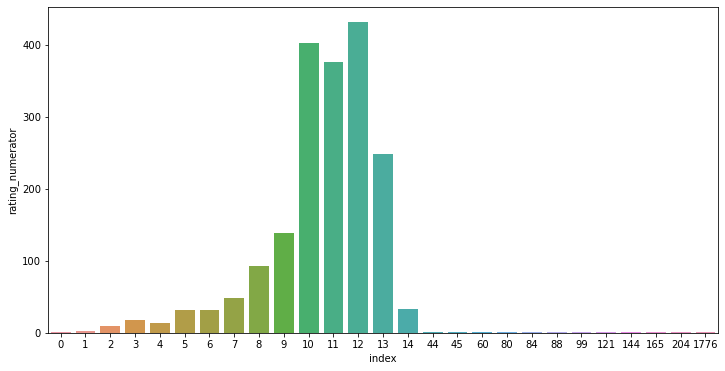

In [70]:
sample = pd.DataFrame(tweet_data.rating_numerator.value_counts()).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(sample["index"],sample["rating_numerator"],data=sample );
#sample


- From here it can be seen that most of the ratings were above 10,
- Ratings which when analyzed where seen to be multiples will be visualized
- Rating of 1776/10 and rating of 0/10 seems unusual 
- Tweets with a ratings below 10 seems to be those that were not pictures of dogs
- visualizations will be used to help view them better

In [71]:
#checking the text for these unusual ratings
with pd.option_context('display.max_colwidth', None):
  display(tweet_data[tweet_data.rating_numerator == 1776].jpg_url)
  display(tweet_data[tweet_data.rating_numerator == 1776].text)

683    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

683    This is Atticus. He's quite simply America af.         
Name: text, dtype: object

### Visualisations
The dog wore the american flag colour

In [72]:
Image(url =  'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

In [73]:
with pd.option_context('display.max_colwidth', None):
  display(tweet_data[tweet_data.rating_numerator == 0].text)

210    When you're so blinded by your systematic plagiarism that you forget what day it is.      
Name: text, dtype: object

The tweet with rating of Zero involved some sort of plagiarism

In [74]:
from PIL import Image

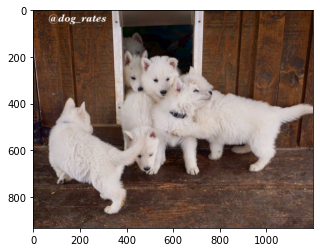

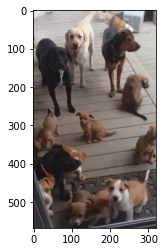

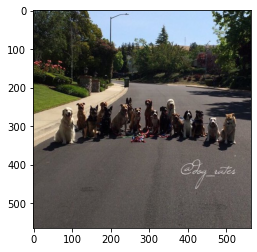

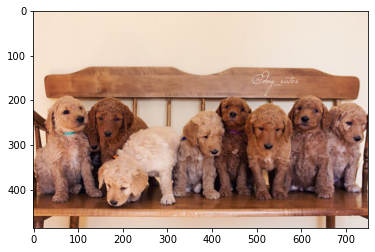

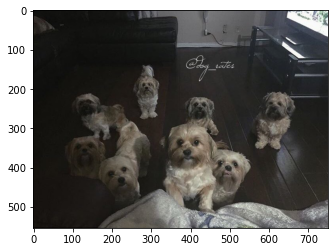

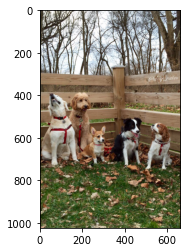

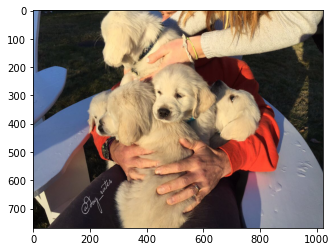

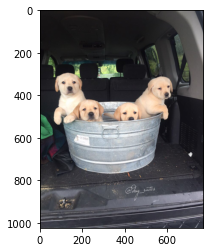

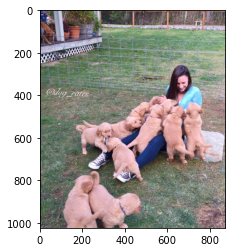

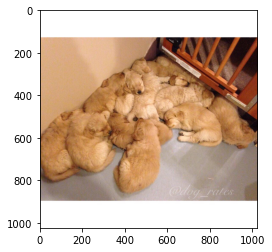

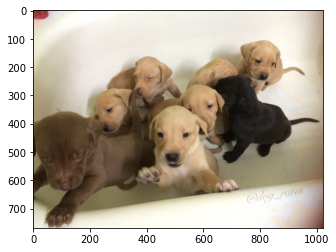

In [75]:
sample_data = tweet_data[(tweet_data.rating_numerator > 14) & (tweet_data.rating_numerator < 1000)]["jpg_url"]

for row in sample_data:
    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

Each Picture contains multiple dogs

C:\Users\Pavilion Gaming\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


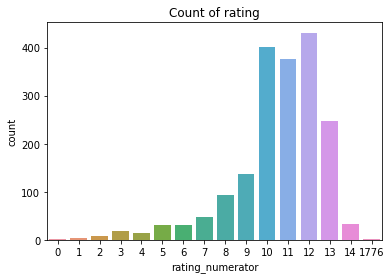

In [76]:
sample_data = tweet_data[(tweet_data.rating_numerator <= 14) | (tweet_data.rating_numerator > 1000)]
plt.figure(figsize=(6,4))
sns.countplot(sample_data["rating_numerator"])
plt.title("Count of rating");

- Most of the ratings were 12/10 ,10/10, 11/10 in a decreasing order

In [77]:
data_use = tweet_data[tweet_data.rating_numerator < 7][["probability_1",
                                                        "probability1_conf","probability1_dog","rating_numerator","jpg_url"]]
pd.DataFrame(data_use.groupby(["rating_numerator","probability1_dog"]).count()["probability_1"])

probability_1
rating_numerator probability1_dog               
0                False                         1
1                False                         3
2                False                         8
                 True                          1
3                False                        15
                 True                          3
4                False                        10
                 True                          4
5                False                        23
                 True                          9
6                False                        20
                 True                         12


- Looks like there is a relationship between ratings with tweets that contained pictures that were not of dogs

### Visualization

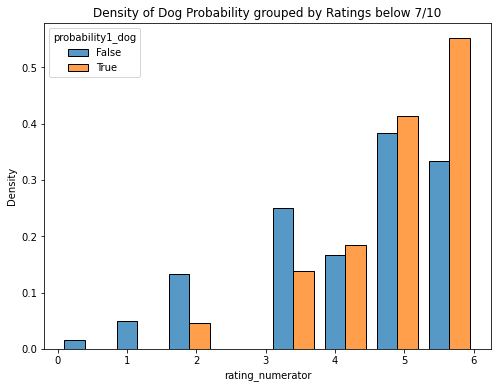

In [78]:


plt.figure(figsize=(8,6))
sns.histplot(x = data_use["rating_numerator"],hue = data_use["probability1_dog"],stat='density', multiple='dodge',
             shrink=0.8, common_norm=False);

plt.title("Density of Dog Probability grouped by Ratings below 7/10");

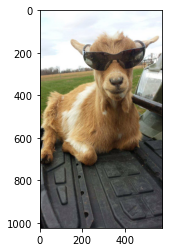

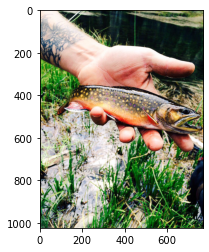

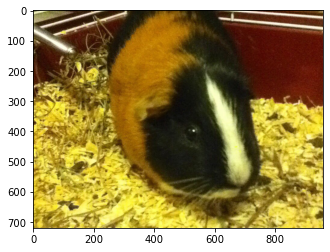

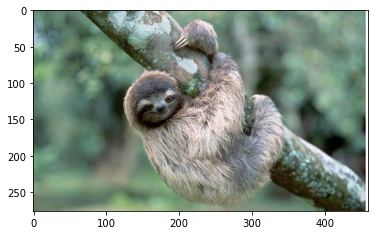

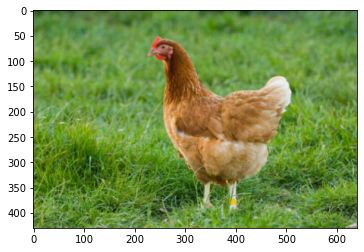

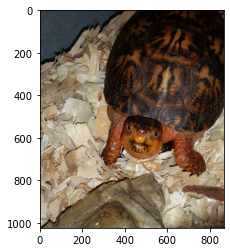

In [79]:
sample_data= data_use[(data_use.rating_numerator <8) & (data_use.probability1_dog==False)]["jpg_url"].tail(6)
for row in sample_data:
    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

- Low rating Pictures that were not actually dogs

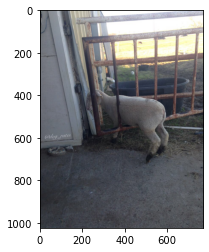

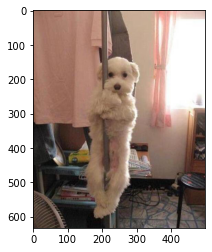

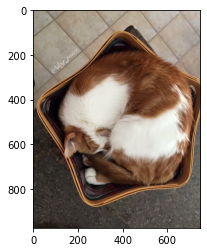

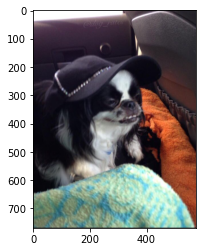

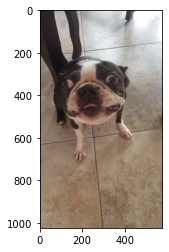

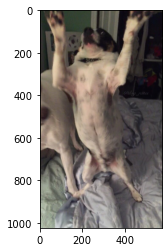

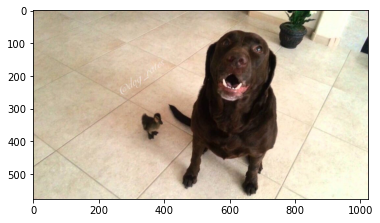

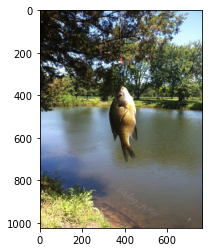

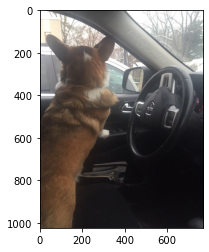

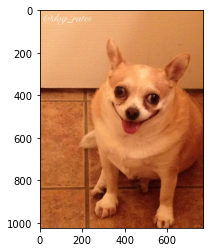

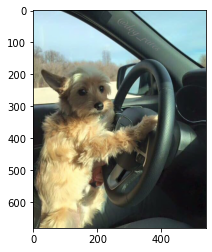

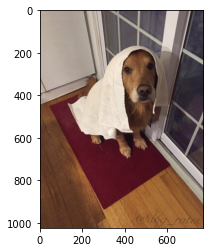

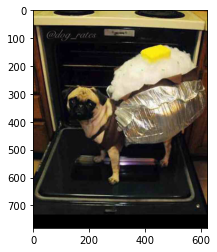

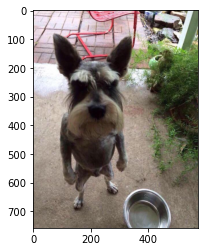

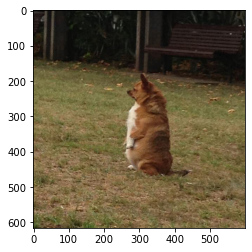

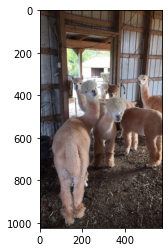

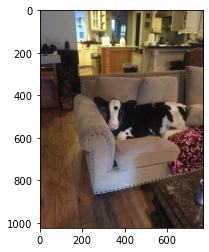

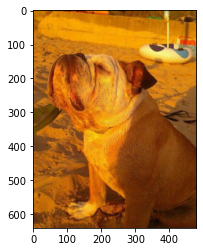

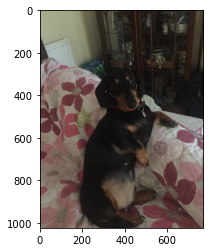

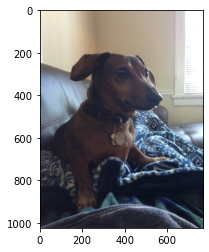

In [80]:
sample_data= data_use[(data_use.rating_numerator <8) & (data_use.probability1_dog==True)]["jpg_url"].tail(20)
for row in sample_data:

    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

- Low rating Pictures of Dogs

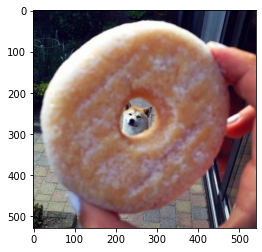

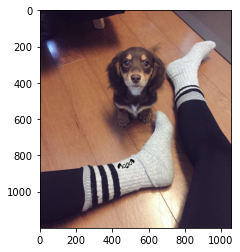

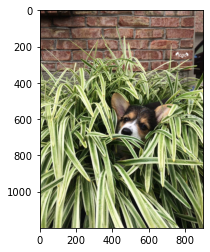

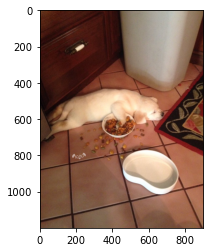

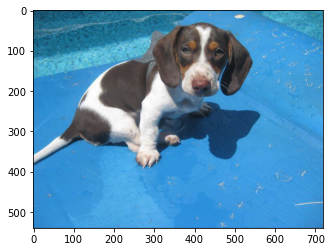

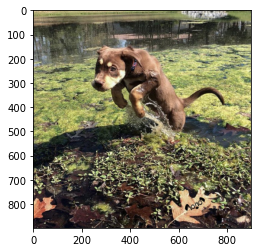

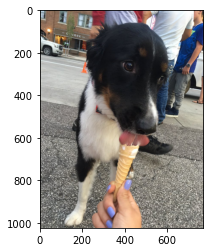

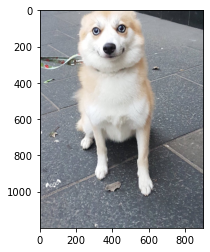

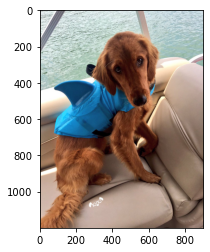

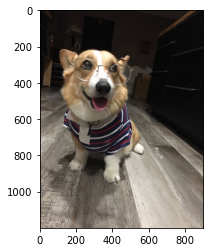

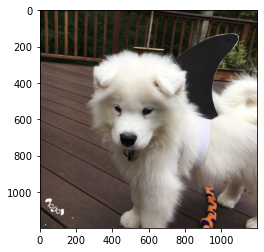

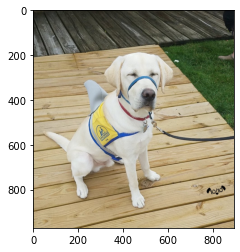

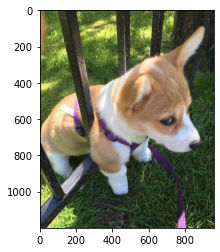

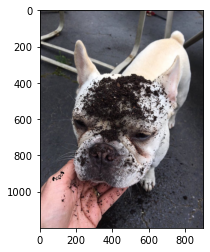

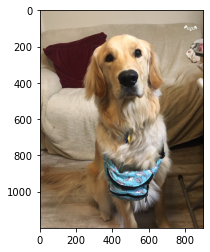

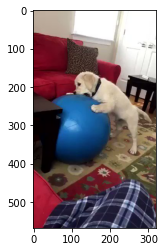

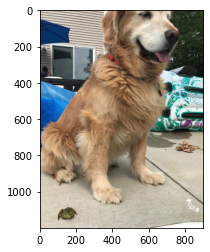

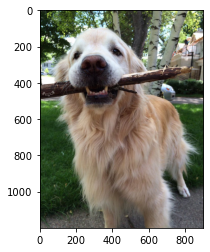

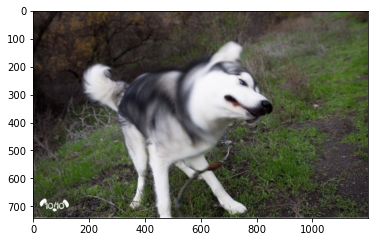

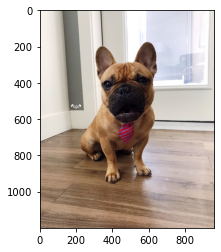

In [81]:
sample_data = tweet_data[tweet_data.rating_numerator > 11]["jpg_url"].head(20)

for row in sample_data:
    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

- Dogs that received high ratings

#### Relationship between the ratings with the frequency of retweets and favourites

In [82]:
mean_rating = tweet_data.groupby(["rating_numerator"]).mean()[["retweet_count", "favorite_count"]].reset_index()
sample_data = mean_rating[(mean_rating.rating_numerator < 14) | (mean_rating.rating_numerator > 1000)]
sample_data

rating_numerator  retweet_count  favorite_count
0                  0    2709.000000    20391.000000
1                  1    2535.666667     6073.000000
2                  2    1040.000000     1829.666667
3                  3     702.555556     1906.277778
4                  4     851.857143     2125.642857
5                  5     989.875000     3062.656250
6                  6     812.562500     2220.906250
7                  7     803.770833     2360.645833
8                  8     699.978495     1991.698925
9                  9     579.043478     1803.601449
10                10    1104.636816     3222.860697
11                11    1682.125000     5431.906915
12                12    2412.125874     9147.664336
13                13    5670.360656    19539.487705
26              1776    2229.000000     4677.000000

### Visualisations

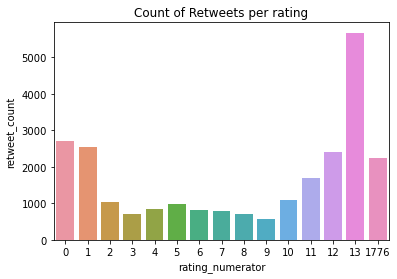

In [83]:
sns.barplot(x="rating_numerator",y="retweet_count", data=sample_data)
plt.title("Count of Retweets per rating");

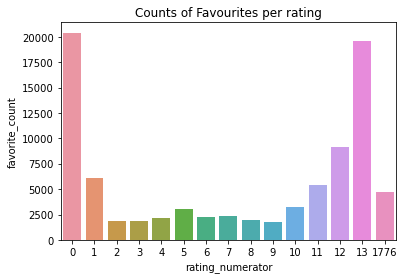

In [84]:
sns.barplot(x="rating_numerator",y="favorite_count", data=sample_data)
plt.title("Counts of Favourites per rating");

#### Most Common breed of dog

In [85]:
breed_fav = pd.DataFrame(tweet_data.groupby(["rating_numerator","named_dog"]).mean()["favorite_count"]).reset_index()
breed_fav = breed_fav[breed_fav.rating_numerator > 9]

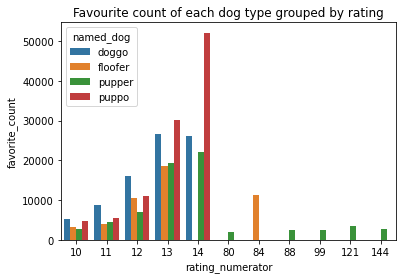

In [86]:
sns.barplot(x = "rating_numerator", y = "favorite_count",hue="named_dog", data=breed_fav)
plt.title("Favourite count of each dog type grouped by rating");

From here it can be seen that most people liked pictures of doggo and puppo dogs.

Samples of our top favourite dog: **Pupppo**

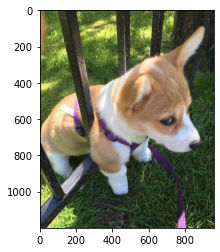

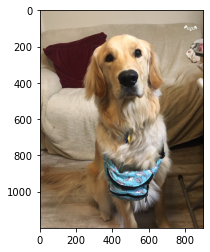

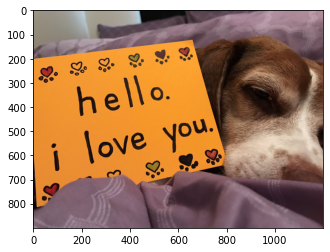

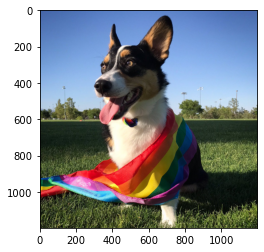

In [87]:
sample_data = tweet_data[tweet_data.named_dog=="puppo"]["jpg_url"].head(4)

for row in sample_data:
    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

Samples of our 2nd top favourite dog: **Doggo**

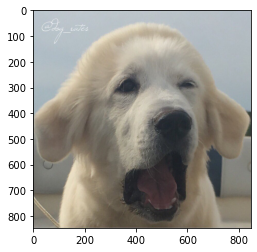

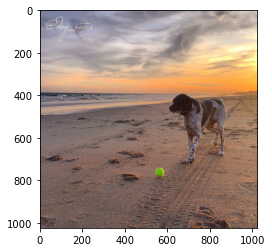

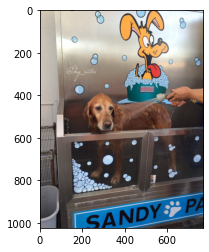

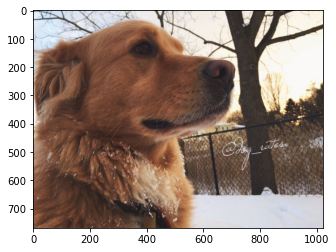

In [88]:
sample_data = tweet_data[tweet_data.named_dog=="doggo"]["jpg_url"].tail(4)

for row in sample_data:
    response = requests.get(row)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(img)

#### What are the most common words used for high rated dogs and low rated dogs

In [89]:
from wordcloud import WordCloud

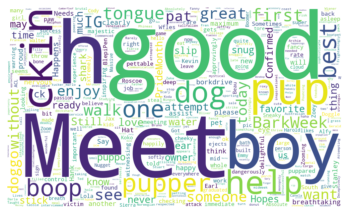

In [90]:
sample = tweet_data[tweet_data.rating_numerator > 11].head(100)
test = "".join(sample.text.str.replace("\"",""))
test = test.replace("af","")

word_cloud = WordCloud(collocations = False, background_color = 'white',width=1000,height=600, max_words=500).generate(test)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

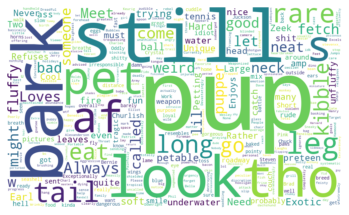

In [91]:
sample = tweet_data[tweet_data.rating_numerator < 6]
test = "".join(sample.text.str.replace("\"",""))
test = test.replace("dog","")

word_cloud = WordCloud(collocations = False, background_color = 'white',width=1000,height=600, max_words=400).generate(test)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### TOP 10 DOG Breeds @WeDogRates TO HAVE BEEN RATED

In [92]:
top_dogs = pd.DataFrame(tweet_data[tweet_data.probability1_dog==True]["probability_1"].value_counts()[:20]).reset_index()

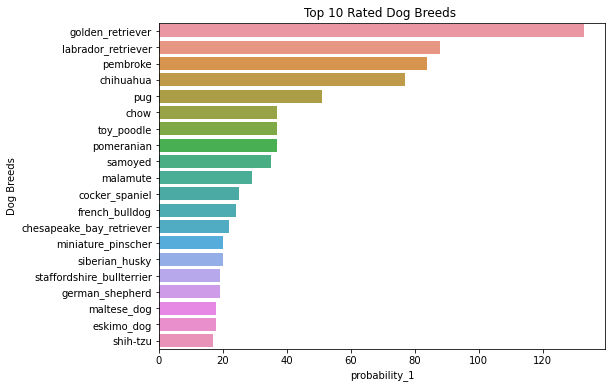

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(x = "probability_1",y="index",data=top_dogs )
plt.title("Top 10 Rated Dog Breeds ")
plt.ylabel("Dog Breeds");

#### Does the length of the tweet have a trelationship with the ratings?

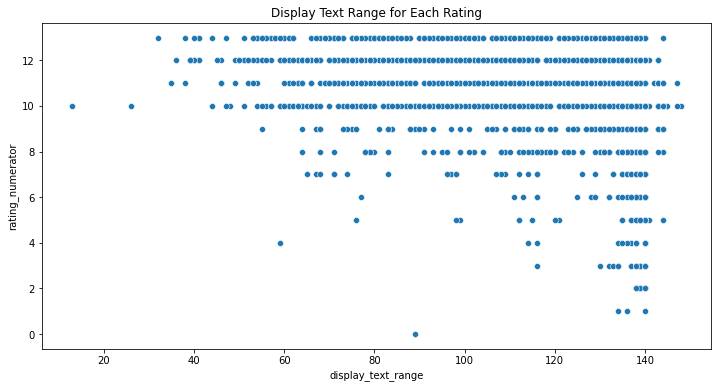

In [94]:
plt.figure(figsize=(12,6))
sample_data = tweet_data[tweet_data.rating_numerator < 14]

sns.scatterplot(x = "display_text_range",y="rating_numerator", data=sample_data)
plt.title("Display Text Range for Each Rating");

Looks like there isn't much of a relationship of the length of the display text to their rating

### Insights

1. Why there was a dog rating of 1776/10 was because the dog wore the American flag thus, the independence year was used as its rating

2. Tweets with lower rating were mostly because the pictures poseted were not dog pictures or involved some sort of plagiarism

3. Dog ratings that contained ratings of greater value than the numerator were were pictures of dogs in multiples thus a rating in multiple form was given, which when reduced to its highest common factor follows the standard rating by #WeRateDogs

4. Tweets with higher retweet and favourite count had a higher rating 

5. Puppo and doggo dogs seem to be the dogs with higher ratings

6. Higher ratings dog mostly contains words like `good`, `best`,`meet`, `boy`, `help` while lower rated dogs mostly contained words like `bark, pup, still, pet, tail, rare`

7. Dog breeds mostly rated in #WeRateDogs are `golden retriever`,`Labrador retreiver`,`Pembroke`,`chihuahua`,`pug`